# Tutorial 1 - 2D Examples for MDVContainment
To get acquanted with the functionalities of MDVContainment we start with 2D systems due to their clean visualization.

1) Single island in ocean
2) Nested islands in ocean
3) Translation invariance (up to voxel resolution)
4) Multiple outsides
5) Closing (small) holes
6) Diagonal neighbours are included

## Dependencies

In [1]:
import mdvcontainment as mdvc
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import webbrowser

## Data generation funtions
Some helper functions to easily generate GRO files from voxel masks.

In [2]:
def make_test_universe(voxels, angles=(90,90,90)):
    """
    Returns a universe filled with the specified points.
    """

    # Obtaining the PBC shape in Anghstrom (A)
    dim = np.array(voxels.shape)*10
    
    # Converting the voxels to points and 
    #  changing the distance unit from nm to A and 
    #  adding a 5 A offset. 
    coordinates_fill = (np.vstack(np.where(voxels != 0)).T)*10 + 5
    coordinates_empty = (np.vstack(np.where(voxels == 0)).T)*10 + 5
    
    # Creating the empty univerese
    universe = mda.Universe.empty(
        n_atoms = coordinates_fill.shape[0] + coordinates_empty.shape[0],
        trajectory = True,
    )
    
    # Fill the universe with the positions
    universe.atoms.positions = np.vstack([coordinates_fill, coordinates_empty])
    
    # Creating the atom names
    names = ['A']*coordinates_fill.shape[0] + ['B']*coordinates_empty.shape[0]
    universe.add_TopologyAttr('name', names)
    
    # Add the PBC conditions
    universe.dimensions = [*dim, *angles]
    
    return universe

In [3]:
def make_island_2D(name='island_2D.gro', roll=0):
    """
    Returns and writes the atomgroup for a simple island in the ocean (2D).
    """

    # Creating the boolean mask.
    shape = (10, 10 , 1)
    voxels = np.zeros(shape)
    voxels[3:7, 3:7, 0] = 1
    
    # Translate periodically 
    voxels = np.roll(voxels, roll, 0)
    voxels = np.roll(voxels, roll, 1)
    
    # Visualize the generated system
    plt.imshow(voxels)

    # Creating the universe
    test_universe = make_test_universe(voxels)
    test_universe.atoms.write(name)
    
    return test_universe

In [4]:
def make_nested_island_2D(name='nested_island_2D.gro', roll=0):
    """
    Returns and writes the atomgroup for a nesyed island in the ocean (2D).
    """

    # Creating the boolean mask
    shape = (10, 10 , 1)
    voxels = np.zeros(shape)
    voxels[2:8, 2:8, 0] = 1
    voxels[3:7, 3:7, 0] = 0
    voxels[4:6, 4:6, 0] = 1
    
    # Translate periodically 
    voxels = np.roll(voxels, roll, 0)
    voxels = np.roll(voxels, roll, 1)
    
    # Show the generated system
    plt.imshow(voxels)

    # Creating the universe
    test_universe = make_test_universe(voxels)
    test_universe.atoms.write(name)
    
    return test_universe

In [5]:
def make_nested_island_2D_imperfect(name='nested_island_2D.gro', roll=0):
    """
    Returns and writes the atomgroup for a nesyed island in the ocean (2D).
    """

    # Creating the boolean mask
    shape = np.array((14, 14, 1))
    voxels = np.zeros(shape)
    voxels[2:12, 2:12, 0] = 1
    voxels[2, 4, 0] = 0
    voxels[3:11, 3:11, 0] = 0
    voxels[6:8, 6:8, 0] = 1
    
    # Translate periodically 
    voxels = np.roll(voxels, roll, 0)
    voxels = np.roll(voxels, roll, 1)
    
    # Show the generated system
    plt.imshow(voxels)

    # Creating the universe
    test_universe = make_test_universe(voxels)
    test_universe.atoms.write(name)
    
    return test_universe

In [6]:
def make_ribbon_2D(name='ribbon_2D.gro', roll=0):
    """
    Returns and writes the atomgroup for a system of diagonal ribbons (2D).
    """

    # Creating the boolean mask.
    shape = (10, 10 , 1)
    voxels = np.zeros(shape)
    
    # First row
    voxels[0, 5, 0] = 1
    voxels[1, 6, 0] = 1
    voxels[2, 7, 0] = 1
    voxels[3, 8, 0] = 1
    voxels[4, 9, 0] = 1
    voxels[5, 0, 0] = 1
    voxels[6, 1, 0] = 1
    voxels[7, 2, 0] = 1
    voxels[8, 3, 0] = 1
    voxels[9, 4, 0] = 1
    
    # Second row
    voxels[1, 5, 0] = 1
    voxels[2, 6, 0] = 1
    voxels[3, 7, 0] = 1
    voxels[4, 8, 0] = 1
    voxels[5, 9, 0] = 1
    voxels[6, 0, 0] = 1
    voxels[7, 1, 0] = 1
    voxels[8, 2, 0] = 1
    voxels[9, 3, 0] = 1
    voxels[0, 4, 0] = 1
    
    # Translate periodically 
    voxels = np.roll(voxels, roll, 0)
    voxels = np.roll(voxels, roll, 1)
    
    # Show the generated system
    plt.imshow(voxels)

    # Creating the universe
    test_universe = make_test_universe(voxels)
    test_universe.atoms.write(name)
    
    return test_universe

In [7]:
def make_diag_neighbors_2D(name='diag_neighbors_2D.gro', roll=0):
    """
    Returns and writes the atomgroup for a system of diagonal ribbons (2D).
    """

    # Creating the boolean mask.
    shape = (13, 13 , 1)
    voxels = np.zeros(shape)
    
    # First row
    voxels[6, 2, 0] = 1
    voxels[7, 3, 0] = 1
    voxels[8, 4, 0] = 1
    voxels[9, 5, 0] = 1
    voxels[10, 6, 0] = 1
    voxels[5, 3, 0] = 1
    voxels[4, 4, 0] = 1
    voxels[3, 5, 0] = 1
    voxels[2, 6, 0] = 1
    voxels[3, 7, 0] = 1
    voxels[4, 8, 0] = 1
    voxels[5, 9, 0] = 1
    voxels[6, 10, 0] = 1
    voxels[7, 9, 0] = 1
    voxels[8, 8, 0] = 1
    voxels[9, 7, 0] = 1
    
    # Translate periodically 
    voxels = np.roll(voxels, roll, 0)
    voxels = np.roll(voxels, roll, 1)
    
    # Show the generated system
    plt.imshow(voxels)

    # Creating the universe
    test_universe = make_test_universe(voxels)
    test_universe.atoms.write(name)
    
    return test_universe

In [59]:
def make_comple_example_2D(name='complex_2D.gro', roll=0):
    """
    Returns and writes and atomgroup of a complex example for 2D.
    """
    # Creating the boolean mask.
    shape = (14, 14 , 1)
    voxels = np.zeros(shape)
    
    # First row
    voxels[:7] = 1
    voxels[2:5,2:5,0] = 0
    voxels[3,3,0] = 1
    voxels[9:12,4:12,0] = 1
    voxels[10,10,0] = 0
    voxels[8,8,0] = 0
    voxels[10,2,0] = 1
    voxels[10,5,0] = 0
    
    # Translate periodically 
    voxels = np.roll(voxels, roll, 0)
    voxels = np.roll(voxels, roll, 1)
    
    # Show the generated system
    plt.imshow(voxels)

    # Creating the universe
    test_universe = make_test_universe(voxels)
    test_universe.atoms.write(name)

    return test_universe 

## 1 - Island
This is the most basic of containment hierarchies. We do not use blurring, as we have voxel perfect input.

/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/coordinates/GRO.py:421: UserWarning: Supplied AtomGroup was missing the following attributes: resnames, resids. These will be written with default values. Alternatively these can be supplied as keyword arguments.
  warnings.warn(


<Universe with 100 atoms>

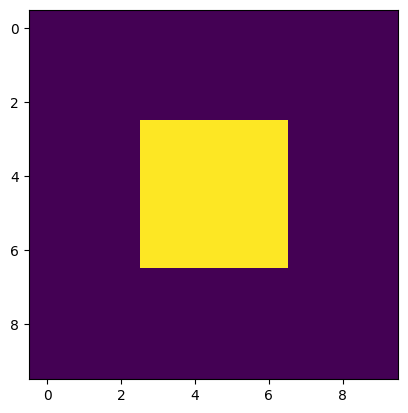

In [8]:
# Generate the test data
base_name = 'island_2D'
make_island_2D(base_name + '.gro')

In [9]:
# Load the GRO
u = mda.Universe(base_name + '.gro')
# Make the required selection
selection = u.select_atoms('name is A')

/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: A
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [10]:
# Generate the containment hierarchy
containers = mdvc.Containers(selection.atoms, resolution=1, blur_amount=0)

Creating voxel masks with a resolution of 1...
Blurring voxel masks with 0...
Non PBC-labeling...
Obtaining bridges...
Calculating the ranks...
The ranks are {(1,): 1, (-1,): 3}
Calculating the pairs...
Relabeling taking PBC into account...
Creating graphs...
Annotating the containment graph...
Done!


In [11]:
# Plot the containment hierarchy as nodes (size is occupancy)
containers.plot(name=base_name + '.html')

island_2D.html


In [12]:
# Render using VMD and (custom) render scripts
containers.render(prefix=base_name + '_')
containers.load_renders(prefix=base_name + '_')

/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/coordinates/GRO.py:421: UserWarning: Supplied AtomGroup was missing the following attributes: names, resnames, resids. These will be written with default values. Alternatively these can be supplied as keyword arguments.
  warnings.warn(




Container -1
------------------------
{'UNK': 84}
I wrote island_2D_-1.gro
Info) VMD for LINUXAMD64, version 1.9.4a55 (November 26, 2021)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 16 CPUs.
Info)   CPU features: SSE2 SSE4.1 AVX AVX2 FMA F16 HT 
Info) Free system memory: 28GB (91%)
Info) Creating CUDA device pool and initializing hardware...
Info) Detected 1 available CUDA accelerator::
Info) [0] Quadro T2000 with Max-Q Design 16 SM_7.5 1.4 GHz, 3.8GB RAM SP32 KT AE3 ZC
Info) OpenGL renderer: Mesa Intel(R) UHD Graphics (CML GT2)
Info)   Features: STENCIL MSAA(4) MDE CVA MTX NPOT PP PS GLSL(OVFS)

In [13]:
# Plot using the VMD imagaes
containers.plot(name=base_name + '_renders.html')
# Open in a new tab, for the images in the graph are not shown in jupyter notebook
webbrowser.open_new_tab(base_name + '_renders.html')

island_2D_renders.html


True

## 2 - Nested Islands
A slightly more elaborate containment hierarchy, we still turn off blurring as we have voxel perfect input.

/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/coordinates/GRO.py:421: UserWarning: Supplied AtomGroup was missing the following attributes: resnames, resids. These will be written with default values. Alternatively these can be supplied as keyword arguments.
  warnings.warn(


<Universe with 100 atoms>

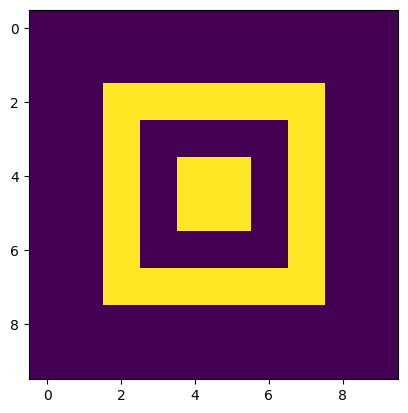

In [14]:
# Generate the test data
base_name = 'nested_island_2D'
make_nested_island_2D(base_name + '.gro')

In [15]:
# Load the GRO
u = mda.Universe(base_name + '.gro')
selection = u.select_atoms('name is A')

/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: A
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [16]:
# Generate the containment hierarchy
containers = mdvc.Containers(selection.atoms, resolution=1, blur_amount=0)

Creating voxel masks with a resolution of 1...
Blurring voxel masks with 0...
Non PBC-labeling...
Obtaining bridges...
Calculating the ranks...
The ranks are {(1,): 1, (2,): 1, (-2,): 1, (-1,): 3}
Calculating the pairs...
Relabeling taking PBC into account...
Creating graphs...
Annotating the containment graph...
Done!


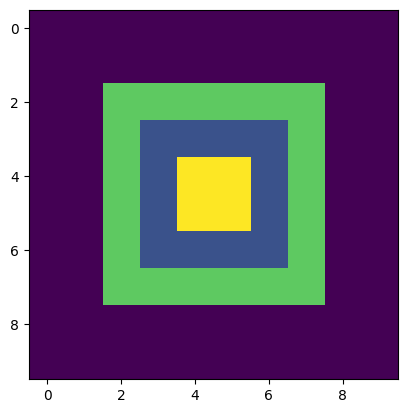

In [17]:
# Show the objects
plt.imshow(containers.data['relabeled_combined_label_array'])

In [18]:
# Plot the containment hierarchy as nodes (size is occupancy)
containers.plot(name= base_name + '.html')

nested_island_2D.html


In [19]:
# Render using VMD
containers.render(prefix=base_name + '_')
containers.load_renders(prefix=base_name + '_')



Container -2
------------------------
{'UNK': 64}


/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/coordinates/GRO.py:421: UserWarning: Supplied AtomGroup was missing the following attributes: names, resnames, resids. These will be written with default values. Alternatively these can be supplied as keyword arguments.
  warnings.warn(


I wrote nested_island_2D_-2.gro
Info) VMD for LINUXAMD64, version 1.9.4a55 (November 26, 2021)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 16 CPUs.
Info)   CPU features: SSE2 SSE4.1 AVX AVX2 FMA F16 HT 
Info) Free system memory: 28GB (91%)
Info) Creating CUDA device pool and initializing hardware...
Info) Detected 1 available CUDA accelerator::
Info) [0] Quadro T2000 with Max-Q Design 16 SM_7.5 1.4 GHz, 3.8GB RAM SP32 KT AE3 ZC
Info) OpenGL renderer: Mesa Intel(R) UHD Graphics (CML GT2)
Info)   Features: STENCIL MSAA(4) MDE CVA MTX NPOT PP PS GLSL(OVFS) 
Info)   Full GLSL rendering mode is availab

In [20]:
# Plot using the VMD imagaes
containers.plot(name= base_name + '_renders.html')
# Open in a new tab, for the images in the graph are not shown in jupyter notebook
webbrowser.open_new_tab(base_name + '_renders.html')

nested_island_2D_renders.html


True

## 3 - Translation Invariance (up to voxel resolution)

/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/coordinates/GRO.py:421: UserWarning: Supplied AtomGroup was missing the following attributes: resnames, resids. These will be written with default values. Alternatively these can be supplied as keyword arguments.
  warnings.warn(


<Universe with 100 atoms>

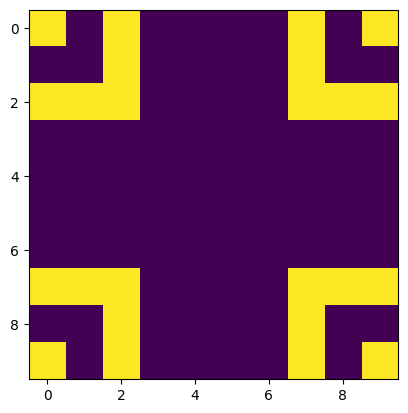

In [21]:
# Generate the test data
base_name = 'nested_island_2D_rolled'
make_nested_island_2D(base_name + '.gro', roll=5)

In [22]:
# Load the GRO
u = mda.Universe(base_name + '.gro')
selection = u.select_atoms('name is A')

/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: A
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [23]:
# Generate the containment hierarchy
containers = mdvc.Containers(selection.atoms, resolution=1, blur_amount=0)

Creating voxel masks with a resolution of 1...
Blurring voxel masks with 0...
Non PBC-labeling...
Obtaining bridges...
Calculating the ranks...
The ranks are {(1, 4, 7, 8): 1, (2, 3, 5, 6): 1, (-5, -4, -3, -1): 1, (-2,): 3}
Calculating the pairs...
Relabeling taking PBC into account...
Creating graphs...
Annotating the containment graph...
Done!


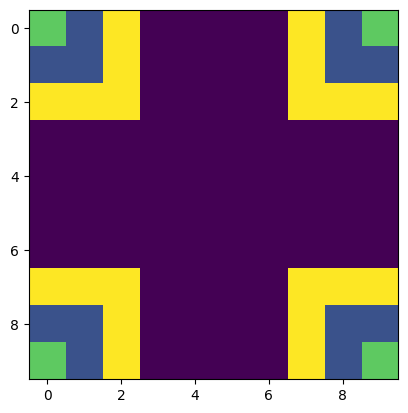

In [24]:
# Show the objects
plt.imshow(containers.data['relabeled_combined_label_array'])

In [25]:
# Plot the containment hierarchy as nodes (size is occupancy)
containers.plot(name= base_name + '.html')

nested_island_2D_rolled.html


In [26]:
# Render using VMD
containers.render(prefix=base_name + '_')
containers.load_renders(prefix=base_name + '_')



Container -2
------------------------
{'UNK': 64}


/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/coordinates/GRO.py:421: UserWarning: Supplied AtomGroup was missing the following attributes: names, resnames, resids. These will be written with default values. Alternatively these can be supplied as keyword arguments.
  warnings.warn(


I wrote nested_island_2D_rolled_-2.gro
Info) VMD for LINUXAMD64, version 1.9.4a55 (November 26, 2021)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 16 CPUs.
Info)   CPU features: SSE2 SSE4.1 AVX AVX2 FMA F16 HT 
Info) Free system memory: 28GB (91%)
Info) Creating CUDA device pool and initializing hardware...
Info) Detected 1 available CUDA accelerator::
Info) [0] Quadro T2000 with Max-Q Design 16 SM_7.5 1.4 GHz, 3.8GB RAM SP32 KT AE3 ZC
Info) OpenGL renderer: Mesa Intel(R) UHD Graphics (CML GT2)
Info)   Features: STENCIL MSAA(4) MDE CVA MTX NPOT PP PS GLSL(OVFS) 
Info)   Full GLSL rendering mode is 

In [27]:
# Plot using the VMD imagaes
containers.plot(name= base_name + '_renders.html')
# Open in a new tab, for the images in the graph are not shown in jupyter notebook
webbrowser.open_new_tab(base_name + '_renders.html')

nested_island_2D_rolled_renders.html


True

## 4 - Multiple outsides
In periodic systems it is possible to have multiple outer outsides.

/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/coordinates/GRO.py:421: UserWarning: Supplied AtomGroup was missing the following attributes: resnames, resids. These will be written with default values. Alternatively these can be supplied as keyword arguments.
  warnings.warn(


<Universe with 100 atoms>

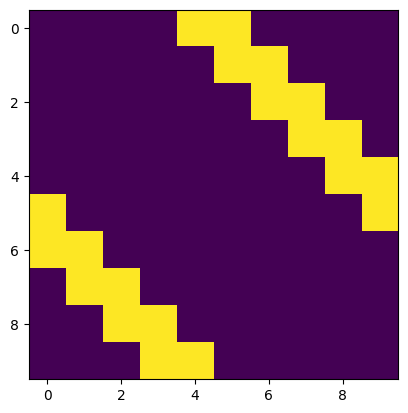

In [28]:
# Generate the test data
base_name = 'ribbon_2D'
make_ribbon_2D(base_name + '.gro', roll=2)

In [29]:
# Load the GRO
u = mda.Universe(base_name + '.gro')
selection = u.select_atoms('name is A')

/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: A
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [30]:
# Generate the containment hierarchy
containers = mdvc.Containers(selection.atoms, resolution=1, blur_amount=0)

Creating voxel masks with a resolution of 1...
Blurring voxel masks with 0...
Non PBC-labeling...
Obtaining bridges...
Calculating the ranks...
The ranks are {(1, 2): 2, (-3, -2, -1): 2}
Calculating the pairs...
Relabeling taking PBC into account...
Creating graphs...
Annotating the containment graph...
Done!


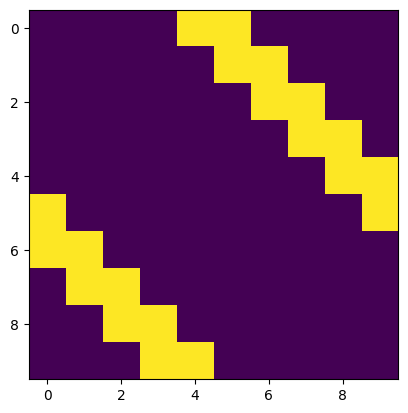

In [31]:
# Show the components
plt.imshow(containers.data['relabeled_combined_label_array'])

In [32]:
# Plot the containment hierarchy as nodes (size is occupancy)
containers.plot(name= base_name + '.html')

ribbon_2D.html


In [33]:
# Render using VMD
containers.render(prefix=base_name + '_')
containers.load_renders(prefix=base_name + '_')



Container -1
------------------------
{'UNK': 80}


/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/coordinates/GRO.py:421: UserWarning: Supplied AtomGroup was missing the following attributes: names, resnames, resids. These will be written with default values. Alternatively these can be supplied as keyword arguments.
  warnings.warn(


I wrote ribbon_2D_-1.gro
Info) VMD for LINUXAMD64, version 1.9.4a55 (November 26, 2021)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 16 CPUs.
Info)   CPU features: SSE2 SSE4.1 AVX AVX2 FMA F16 HT 
Info) Free system memory: 28GB (91%)
Info) Creating CUDA device pool and initializing hardware...
Info) Detected 1 available CUDA accelerator::
Info) [0] Quadro T2000 with Max-Q Design 16 SM_7.5 1.4 GHz, 3.8GB RAM SP32 KT AE3 ZC
Info) OpenGL renderer: Mesa Intel(R) UHD Graphics (CML GT2)
Info)   Features: STENCIL MSAA(4) MDE CVA MTX NPOT PP PS GLSL(OVFS) 
Info)   Full GLSL rendering mode is available.
Inf

In [34]:
# Plot using the VMD imagaes
containers.plot(name= base_name + '_renders.html')
# Open in a new tab, for the images in the graph are not shown in jupyter notebook
webbrowser.open_new_tab(base_name + '_renders.html')

ribbon_2D_renders.html


True

## 5 - Closing (small) holes
We can use boolean closure (dilation followed by erosion). The blur amount indicates how many steps of dilation are performed, followed by an equal amount of erosions. This means that with a blur of '1' we need to have 3 empty voxels between segments for flanking segments to be resolved as separated entities. However, the upside is that we can use this as a cheap method to circumvent small holes (of size 1 2).

/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/coordinates/GRO.py:421: UserWarning: Supplied AtomGroup was missing the following attributes: resnames, resids. These will be written with default values. Alternatively these can be supplied as keyword arguments.
  warnings.warn(


<Universe with 196 atoms>

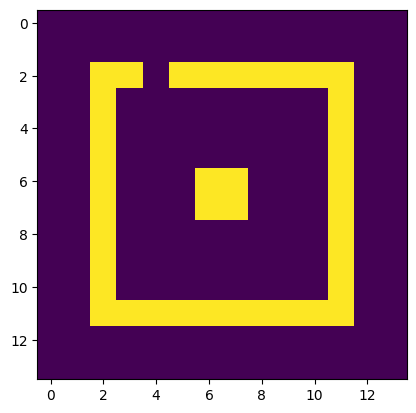

In [35]:
# Generate the test data
base_name = 'nested_island_2D_closed'
make_nested_island_2D_imperfect(base_name + '.gro', roll=0)

In [36]:
# Load the GRO
u = mda.Universe(base_name + '.gro')
selection = u.select_atoms('name is A')

/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: A
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [37]:
# Generate the containment hierarchy
containers = mdvc.Containers(selection.atoms, resolution=1, blur_amount=1)

Creating voxel masks with a resolution of 1...
Blurring voxel masks with 1...
Non PBC-labeling...
Obtaining bridges...
Calculating the ranks...
The ranks are {(1,): 1, (2,): 1, (-2,): 1, (-1,): 3}
Calculating the pairs...
Relabeling taking PBC into account...
Creating graphs...
Annotating the containment graph...
Done!


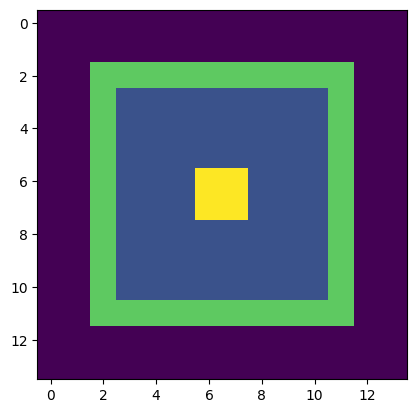

In [38]:
# Show the objects
plt.imshow(containers.data['relabeled_combined_label_array'])

In [39]:
# Plot the containment hierarchy as nodes (size is occupancy)
containers.plot(name= base_name + '.html')

nested_island_2D_closed.html


In [40]:
# Render using VMD
containers.render(prefix=base_name + '_')
containers.load_renders(prefix=base_name + '_')



Container -2
------------------------
{'UNK': 96}


/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/coordinates/GRO.py:421: UserWarning: Supplied AtomGroup was missing the following attributes: names, resnames, resids. These will be written with default values. Alternatively these can be supplied as keyword arguments.
  warnings.warn(


I wrote nested_island_2D_closed_-2.gro
Info) VMD for LINUXAMD64, version 1.9.4a55 (November 26, 2021)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 16 CPUs.
Info)   CPU features: SSE2 SSE4.1 AVX AVX2 FMA F16 HT 
Info) Free system memory: 28GB (91%)
Info) Creating CUDA device pool and initializing hardware...
Info) Detected 1 available CUDA accelerator::
Info) [0] Quadro T2000 with Max-Q Design 16 SM_7.5 1.4 GHz, 3.8GB RAM SP32 KT AE3 ZC
Info) OpenGL renderer: Mesa Intel(R) UHD Graphics (CML GT2)
Info)   Features: STENCIL MSAA(4) MDE CVA MTX NPOT PP PS GLSL(OVFS) 
Info)   Full GLSL rendering mode is 

In [41]:
# Plot using the VMD imagaes
containers.plot(name= base_name + '_renders.html')
# Open in a new tab, for the images in the graph are not shown in jupyter notebook
webbrowser.open_new_tab(base_name + '_renders.html')

nested_island_2D_closed_renders.html


True

## 6 - Diagonal Neighbours are Included
Since all voxels sharing a vertex are included as neighbours, we should consider some edge cases, where the definition of continuity is a bit vague. However, this is not a voxel artifact per se, as the same can occur for a radius search. By using a blur, thin diagonal bleeding is not resolved! Using a dilation could resolve the issue, but decreases the accuracy (not supported by default).

/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/coordinates/GRO.py:421: UserWarning: Supplied AtomGroup was missing the following attributes: resnames, resids. These will be written with default values. Alternatively these can be supplied as keyword arguments.
  warnings.warn(


<Universe with 169 atoms>

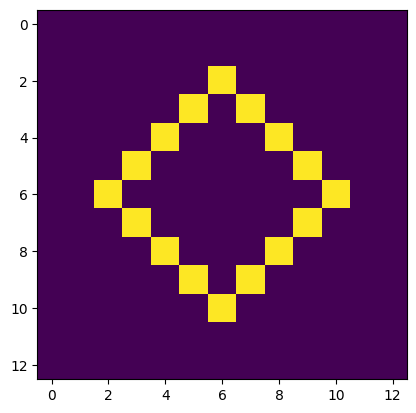

In [42]:
# Generate the test data
base_name = 'diag_neighbor_2D'
make_diag_neighbors_2D(base_name + '.gro', roll=0)

In [43]:
# Load the GRO
u = mda.Universe(base_name + '.gro')
selection = u.select_atoms('name is A')

/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: A
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [44]:
# Generate the containment hierarchy (change the blur to 0/1 to see the effect!)
containers = mdvc.Containers(selection.atoms, resolution=1, blur_amount=0)

Creating voxel masks with a resolution of 1...
Blurring voxel masks with 0...
Non PBC-labeling...
Obtaining bridges...
Calculating the ranks...
The ranks are {(1,): 1, (-1,): 3}
Calculating the pairs...
Relabeling taking PBC into account...
Creating graphs...
Annotating the containment graph...
Done!


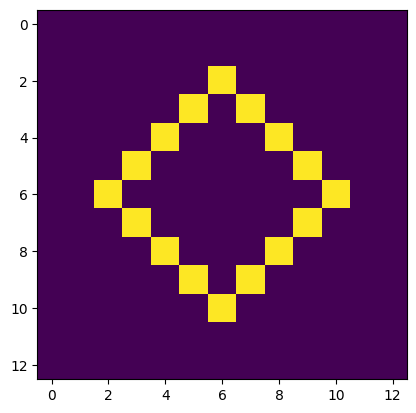

In [45]:
# Show the objects
plt.imshow(containers.data['relabeled_combined_label_array'])

In [46]:
# Plot the containment hierarchy as nodes (size is occupancy)
containers.plot(name= base_name + '.html')

diag_neighbor_2D.html


In [47]:
# Render using VMD
containers.render(prefix=base_name + '_')
containers.load_renders(prefix=base_name + '_')



Container -1
------------------------
{'UNK': 153}


/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/coordinates/GRO.py:421: UserWarning: Supplied AtomGroup was missing the following attributes: names, resnames, resids. These will be written with default values. Alternatively these can be supplied as keyword arguments.
  warnings.warn(


I wrote diag_neighbor_2D_-1.gro
Info) VMD for LINUXAMD64, version 1.9.4a55 (November 26, 2021)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 16 CPUs.
Info)   CPU features: SSE2 SSE4.1 AVX AVX2 FMA F16 HT 
Info) Free system memory: 28GB (91%)
Info) Creating CUDA device pool and initializing hardware...
Info) Detected 1 available CUDA accelerator::
Info) [0] Quadro T2000 with Max-Q Design 16 SM_7.5 1.4 GHz, 3.8GB RAM SP32 KT AE3 ZC
Info) OpenGL renderer: Mesa Intel(R) UHD Graphics (CML GT2)
Info)   Features: STENCIL MSAA(4) MDE CVA MTX NPOT PP PS GLSL(OVFS) 
Info)   Full GLSL rendering mode is availab

In [48]:
# Plot using the VMD imagaes
containers.plot(name= base_name + '_renders.html')
# Open in a new tab, for the images in the graph are not shown in jupyter notebook
webbrowser.open_new_tab(base_name + '_renders.html')

diag_neighbor_2D_renders.html


True

# Complex example in 2D

/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/coordinates/GRO.py:421: UserWarning: Supplied AtomGroup was missing the following attributes: resnames, resids. These will be written with default values. Alternatively these can be supplied as keyword arguments.
  warnings.warn(


<Universe with 196 atoms>

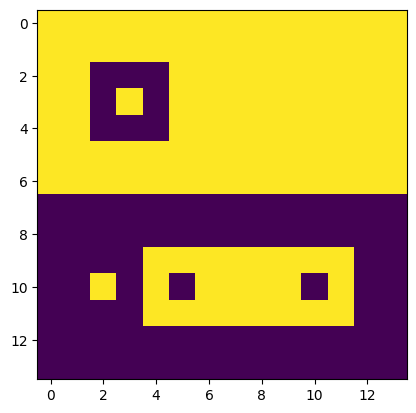

In [60]:
# Generate the test data
base_name = 'complex_2D'
make_comple_example_2D(base_name + '.gro', roll=0)

In [61]:
# Load the GRO
u = mda.Universe(base_name + '.gro')
selection = u.select_atoms('name is A')

/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: A
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [62]:
# Generate the containment hierarchy (change the blur to 0/1 to see the effect!)
containers = mdvc.Containers(selection.atoms, resolution=1, blur_amount=0)

Creating voxel masks with a resolution of 1...
Blurring voxel masks with 0...
Non PBC-labeling...
Obtaining bridges...
Calculating the ranks...
The ranks are {(1,): 2, (2,): 1, (3,): 1, (4,): 1, (-4,): 1, (-3,): 1, (-2,): 2, (-1,): 1}
Calculating the pairs...
Relabeling taking PBC into account...
Creating graphs...
Annotating the containment graph...
Done!


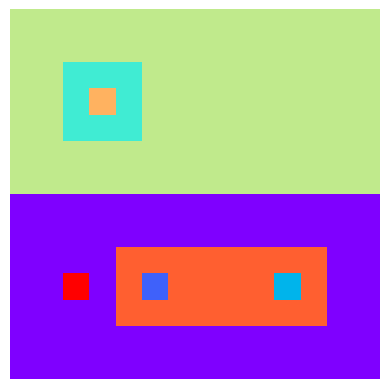

In [76]:
# Show the objects
img = plt.imshow(containers.data['relabeled_combined_label_array'])
plt.axis('off')
img.set_cmap('rainbow')
plt.savefig(base_name + '_components.png', dpi=300)
plt.show()

In [64]:
# Plot the containment hierarchy as nodes (size is occupancy)
containers.plot(name= base_name + '.html')

complex_2D.html


In [65]:
# Render using VMD
containers.render(prefix=base_name + '_')
containers.load_renders(prefix=base_name + '_')

/home/bart/.virtualenvs/mda/lib/python3.10/site-packages/MDAnalysis/coordinates/GRO.py:421: UserWarning: Supplied AtomGroup was missing the following attributes: names, resnames, resids. These will be written with default values. Alternatively these can be supplied as keyword arguments.
  warnings.warn(




Container -4
------------------------
{'UNK': 73}
I wrote complex_2D_-4.gro
Info) VMD for LINUXAMD64, version 1.9.4a55 (November 26, 2021)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 16 CPUs.
Info)   CPU features: SSE2 SSE4.1 AVX AVX2 FMA F16 HT 
Info) Free system memory: 28GB (90%)
Info) Creating CUDA device pool and initializing hardware...
Info) Detected 1 available CUDA accelerator::
Info) [0] Quadro T2000 with Max-Q Design 16 SM_7.5 1.4 GHz, 3.8GB RAM SP32 KT AE3 ZC
Info) OpenGL renderer: Mesa Intel(R) UHD Graphics (CML GT2)
Info)   Features: STENCIL MSAA(4) MDE CVA MTX NPOT PP PS GLSL(OVFS

In [66]:
# Plot using the VMD imagaes
containers.plot(name= base_name + '_renders.html')
# Open in a new tab, for the images in the graph are not shown in jupyter notebook
webbrowser.open_new_tab(base_name + '_renders.html')

complex_2D_renders.html


True